In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-5.029795071578121 155.26892739355065
20.23602422866935 23.965863580123766
-21.099374621740864 -16.43618000270814
-54.58104487725569 73.8019106379329
-21.633457654548508 -77.50967898730948
32.0868751504443 -140.69897068579002
39.05865168172622 -46.19948063741646
24.453371385280832 -103.41765636741259
-20.550727480681786 132.32459037213687
60.15722246283701 -159.30041865087173
89.80843123548661 125.88922481633563
-26.71552347270658 -64.50105067921496
19.64441497868559 -135.76578575788483
12.796067024461735 23.599691826192384
-43.9010889575533 120.38626017576809
-84.5973009374293 -15.834279274887365
-63.344990417185734 -136.73063437036646
-64.61135325522685 57.94500346323784
64.87237032186692 -153.2782725677745
-24.947448921001822 51.29858903368145
76.00755539764862 174.2562687061906
59.557148677555574 40.84361657842581
51.75912915508238 -0.9343709386176613
32.08719114861957 -151.52091397812006
45.39265322969891 38.84644945955091
-66.46008361420438 -89.80541798052599
87.98426521970381 14

19.805809606262798 58.064600945999985
33.48374924301879 101.98375946173178
64.76128925984548 -111.4391159828427
66.10141250806385 167.58741446687475
64.34760912277156 119.37613220517318
-61.56166231359869 96.5143657911189
23.905031703532572 -104.86859925242987
-42.5500448113062 -1.6826344698905302
78.55220266819424 -137.99216202661526
-53.82850745530742 108.60219409993005
83.53607541794875 80.65246981951998
11.972377685432761 -47.821452111562394
-48.206479760741615 -131.15909116148265
11.485940260145028 -136.1077742415688
6.031405821096527 -175.19983296103584
-60.500212633049216 -87.17457036028523
78.42113337886008 178.80132860236836
65.85865068947584 63.25755439368851
-89.9978948150293 -74.29191776396515
63.24042915341877 -12.941811564640744
-81.25187883367049 52.26377466416767
-83.03315125838577 102.80832930670954
49.19897135062416 36.57021261902858
86.19635672068387 -9.476121918837322
-78.24445011835235 157.05134151349512
-9.229285626126341 111.85730423879721
22.200088226263404 171.

In [6]:
len(coordinates)

1500

In [5]:
from citipy import citipy


In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)


603

In [7]:
import requests
requests.__version__


'2.27.1'

In [8]:
# For each city in our lats_lngs list, we need to retrieve the following data and add it to a DataFrame:

# City, country, and date
# Latitude and longitude
# Maximum temperature
# Humidity
# Cloudiness
# Wind speed


In [9]:
# PSEUDOCODE

# Let's use pseudocode to map out, at a high level, how we will get the weather data 
    # for each city for the website.

# We will need to do the following:

# 1. Import our dependencies and initialize counters and an empty list that will hold 
#     the weather data.
# 2. Loop through the cities list.
# 3. Group the cities in sets of 50 to log the process as we find the weather data for
#     each city.
#     - Two counters will be needed here: one to log the city count from 1 to 50, and 
#         another for the sets.
# 4. Build the city_url or endpoint for each city.
# 5. Log the URL and the record and set numbers.
# 6. Make an API request for each city.
# 7. Parse the JSON weather data for the following:
#     - City, country, and date
#     - Latitude and longitude
#     - Maximum temperature
#     - Humidity
#     - Cloudiness
#     - Wind speed
# 8. Add the data to a list in a dictionary format and then convert the list to a 
#     DataFrame.


In [10]:
import requests
import os
from dotenv import load_dotenv
load_dotenv()
weather_api_key = os.getenv("OpenWeather_API_KEY")
import time
from datetime import datetime


In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval")
print("-"*40)

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval
----------------------------------------


In [13]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [14]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%b-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                      "Lat": city_lat,
                      "Lng": city_lng,
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-"*40)
print("Data Retrieval Complete.")
print("-"*40)


Processing record 1 of Set 1 | yellowknife
Processing record 2 of Set 1 | goderich
Processing record 3 of Set 1 | rikitea
Processing record 4 of Set 1 | hohhot
Processing record 5 of Set 1 | koygorodok
Processing record 6 of Set 1 | alofi
Processing record 7 of Set 1 | ponta do sol
Processing record 8 of Set 1 | syracuse
Processing record 9 of Set 1 | chokurdakh
Processing record 10 of Set 1 | omboue
Processing record 11 of Set 1 | carnarvon
Processing record 12 of Set 1 | mehamn
Processing record 13 of Set 1 | jamestown
Processing record 14 of Set 1 | tiksi
Processing record 15 of Set 1 | kodiak
Processing record 16 of Set 1 | punta arenas
Processing record 17 of Set 1 | zilair
Processing record 18 of Set 1 | saint-pierre
Processing record 19 of Set 1 | waipawa
Processing record 20 of Set 1 | cape town
Processing record 21 of Set 1 | puerto ayora
Processing record 22 of Set 1 | ushuaia
Processing record 23 of Set 1 | lengshuijiang
Processing record 24 of Set 1 | nizhneyansk
City not f

Processing record 34 of Set 4 | marsh harbour
Processing record 35 of Set 4 | gigmoto
Processing record 36 of Set 4 | yanan
City not found. Skipping...
Processing record 37 of Set 4 | olinda
Processing record 38 of Set 4 | grindavik
Processing record 39 of Set 4 | susanville
Processing record 40 of Set 4 | kanniyakumari
Processing record 41 of Set 4 | half moon bay
Processing record 42 of Set 4 | strezhevoy
Processing record 43 of Set 4 | arauca
Processing record 44 of Set 4 | dunga bunga
Processing record 45 of Set 4 | deputatskiy
Processing record 46 of Set 4 | sabang
Processing record 47 of Set 4 | ocean city
Processing record 48 of Set 4 | maniitsoq
Processing record 49 of Set 4 | gravdal
Processing record 50 of Set 4 | yaan
Processing record 1 of Set 5 | barao de melgaco
Processing record 2 of Set 5 | harnosand
Processing record 3 of Set 5 | escanaba
Processing record 4 of Set 5 | dessalines
Processing record 5 of Set 5 | bayir
Processing record 6 of Set 5 | avarua
Processing reco

Processing record 25 of Set 8 | mitchell
Processing record 26 of Set 8 | muisne
Processing record 27 of Set 8 | mzimba
Processing record 28 of Set 8 | moree
Processing record 29 of Set 8 | tual
Processing record 30 of Set 8 | luwuk
Processing record 31 of Set 8 | kurumkan
Processing record 32 of Set 8 | kisangani
Processing record 33 of Set 8 | codrington
Processing record 34 of Set 8 | vardo
Processing record 35 of Set 8 | leningradskiy
Processing record 36 of Set 8 | monywa
Processing record 37 of Set 8 | victoria
Processing record 38 of Set 8 | gorontalo
Processing record 39 of Set 8 | awjilah
Processing record 40 of Set 8 | ilulissat
Processing record 41 of Set 8 | vilhena
Processing record 42 of Set 8 | nalut
Processing record 43 of Set 8 | lavrentiya
Processing record 44 of Set 8 | paita
Processing record 45 of Set 8 | honiara
Processing record 46 of Set 8 | phan thiet
Processing record 47 of Set 8 | padang
Processing record 48 of Set 8 | grenada
Processing record 49 of Set 8 | v

Processing record 14 of Set 12 | ahwa
Processing record 15 of Set 12 | tautira
Processing record 16 of Set 12 | hushitai
Processing record 17 of Set 12 | alasehir
Processing record 18 of Set 12 | umzimvubu
City not found. Skipping...
Processing record 19 of Set 12 | watrous
Processing record 20 of Set 12 | poso
Processing record 21 of Set 12 | rocha
Processing record 22 of Set 12 | sola
Processing record 23 of Set 12 | tacoronte
Processing record 24 of Set 12 | dickinson
Processing record 25 of Set 12 | fort wellington
Processing record 26 of Set 12 | henties bay
Processing record 27 of Set 12 | nome
Processing record 28 of Set 12 | meulaboh
Processing record 29 of Set 12 | juba
Processing record 30 of Set 12 | mareeba
Processing record 31 of Set 12 | tuy hoa
Processing record 32 of Set 12 | kaluga
Processing record 33 of Set 12 | luganville
Processing record 34 of Set 12 | bago
Processing record 35 of Set 12 | bitlis
Processing record 36 of Set 12 | mezen
Processing record 37 of Set 1

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,59.40,86,94,13.13,CA,2022-Jul-20 06:12:23
1,Goderich,43.7501,-81.7165,77.32,73,91,13.80,CA,2022-Jul-20 06:19:51
2,Rikitea,-23.1203,-134.9692,73.67,78,3,6.62,PF,2022-Jul-20 06:15:50
3,Hohhot,40.8106,111.6522,88.09,30,20,6.71,CN,2022-Jul-20 06:19:52
4,Koygorodok,60.4450,50.9968,55.27,97,99,8.21,RU,2022-Jul-20 06:19:53
5,Alofi,-19.0595,-169.9187,75.09,78,8,16.11,NU,2022-Jul-20 06:19:53
6,Ponta Do Sol,32.6667,-17.1000,70.43,74,14,5.88,PT,2022-Jul-20 06:19:53
7,Syracuse,37.0881,15.2792,76.59,65,0,8.03,IT,2022-Jul-20 06:19:54
8,Chokurdakh,70.6333,147.9167,51.35,59,97,12.10,RU,2022-Jul-20 06:17:59
9,Omboue,-1.5746,9.2618,71.89,91,100,7.14,GA,2022-Jul-20 06:19:55


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2022-Jul-20 06:12:23,62.4560,-114.3525,59.40,86,94,13.13
1,Goderich,CA,2022-Jul-20 06:19:51,43.7501,-81.7165,77.32,73,91,13.80
2,Rikitea,PF,2022-Jul-20 06:15:50,-23.1203,-134.9692,73.67,78,3,6.62
3,Hohhot,CN,2022-Jul-20 06:19:52,40.8106,111.6522,88.09,30,20,6.71
4,Koygorodok,RU,2022-Jul-20 06:19:53,60.4450,50.9968,55.27,97,99,8.21
5,Alofi,NU,2022-Jul-20 06:19:53,-19.0595,-169.9187,75.09,78,8,16.11
6,Ponta Do Sol,PT,2022-Jul-20 06:19:53,32.6667,-17.1000,70.43,74,14,5.88
7,Syracuse,IT,2022-Jul-20 06:19:54,37.0881,15.2792,76.59,65,0,8.03
8,Chokurdakh,RU,2022-Jul-20 06:17:59,70.6333,147.9167,51.35,59,97,12.10
9,Omboue,GA,2022-Jul-20 06:19:55,-1.5746,9.2618,71.89,91,100,7.14


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# We are going to create a series of scatter plots for each weather parameter against 
# the latitude for all the cities. The students will use these scatter plots to write 
# a summary report on how different weather parameters change based on the latitude.

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

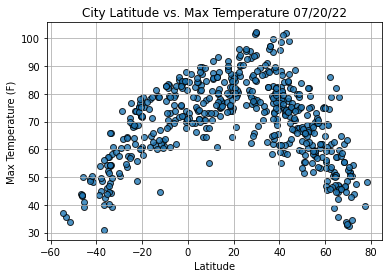

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


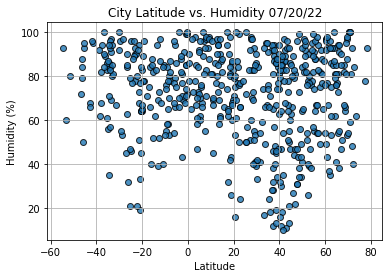

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           humidity,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


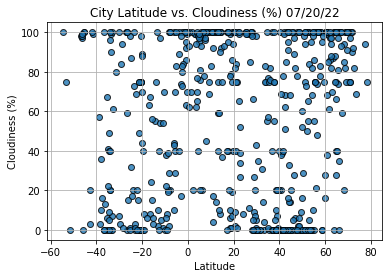

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

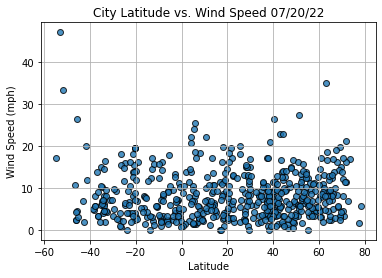

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [38]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [39]:
index13 = city_data_df.loc[13]
index13


City                         Tiksi
Country                         RU
Date          2022-Jul-20 06:16:43
Lat                        71.6872
Lng                       128.8694
Max Temp                     34.34
Humidity                        93
Cloudiness                     100
Wind Speed                   11.34
Name: 13, dtype: object

In [40]:
city_data_df["Lat"] >= 0


0       True
1       True
2      False
3       True
4       True
       ...  
547     True
548     True
549    False
550     True
551    False
Name: Lat, Length: 552, dtype: bool

In [41]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2022-Jul-20 06:12:23,62.4560,-114.3525,59.40,86,94,13.13
1,Goderich,CA,2022-Jul-20 06:19:51,43.7501,-81.7165,77.32,73,91,13.80
3,Hohhot,CN,2022-Jul-20 06:19:52,40.8106,111.6522,88.09,30,20,6.71
4,Koygorodok,RU,2022-Jul-20 06:19:53,60.4450,50.9968,55.27,97,99,8.21
6,Ponta Do Sol,PT,2022-Jul-20 06:19:53,32.6667,-17.1000,70.43,74,14,5.88
...,...,...,...,...,...,...,...,...,...
544,Mirpur Khas,PK,2022-Jul-20 06:35:12,25.5251,69.0159,96.17,50,99,19.93
545,Guangyuan,CN,2022-Jul-20 06:35:13,32.4420,105.8230,86.68,59,31,9.13
547,San Francisco,US,2022-Jul-20 06:35:14,37.7749,-122.4194,65.05,92,75,17.27
548,Tongliao,CN,2022-Jul-20 06:35:14,43.6125,122.2653,84.56,51,100,8.70


In [42]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2022-Jul-20 06:12:23,62.4560,-114.3525,59.40,86,94,13.13
1,Goderich,CA,2022-Jul-20 06:19:51,43.7501,-81.7165,77.32,73,91,13.80
3,Hohhot,CN,2022-Jul-20 06:19:52,40.8106,111.6522,88.09,30,20,6.71
4,Koygorodok,RU,2022-Jul-20 06:19:53,60.4450,50.9968,55.27,97,99,8.21
6,Ponta Do Sol,PT,2022-Jul-20 06:19:53,32.6667,-17.1000,70.43,74,14,5.88


In [43]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


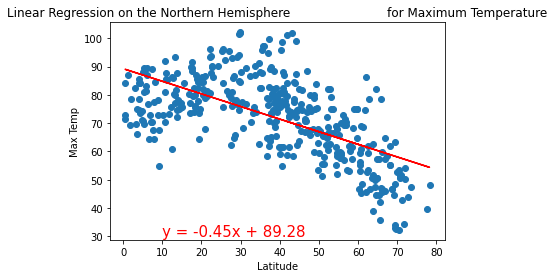

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,30))


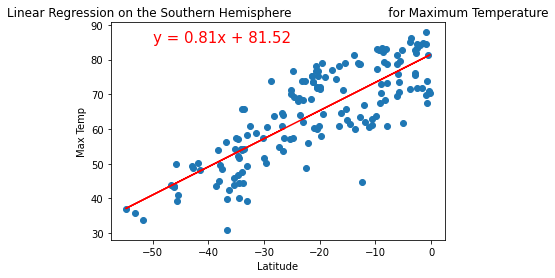

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))


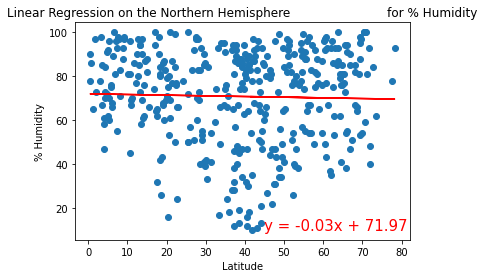

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

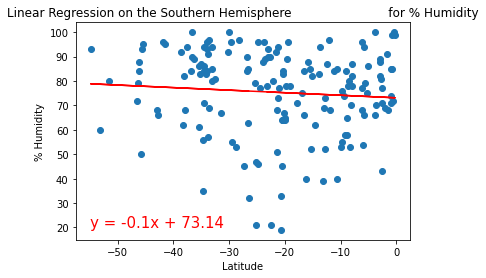

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,20))


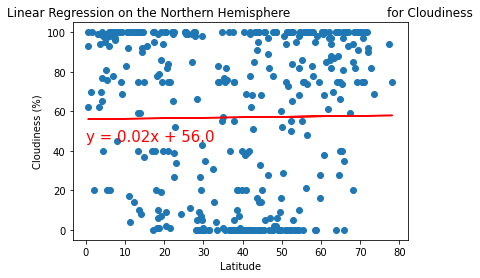

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness (%)',(0,45))

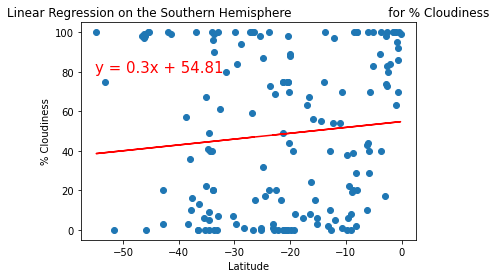

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,80))

In [71]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value:.3f}")

y = 0.3x + 54.81
The p-value is: 0.195
The r-value is: 0.103


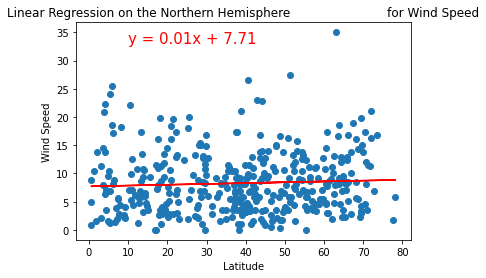

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,33))


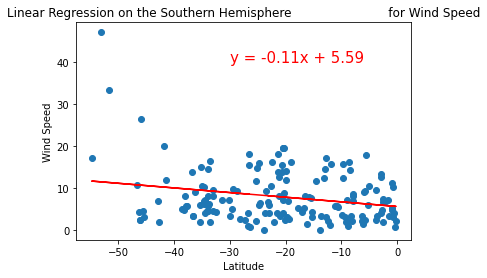

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,40))
